#### 時系列の異常検知

##### やること

- パラメーターaが変わるとデータがどう変わるかを確認
- パラメーターaを複数の値にしたデータを準備し、すべてを同時に学習さして分類できるかを確認
- 何かいい方法があればそれで異常検知

インポート

In [ ]:
#各種のインポート
import torch
from torch import nn,optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import transforms
from torchinfo import summary #torchinfoはニューラルネットの中身を見れるのでおすすめ
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import random

#乱数固定用の処理
seed = 10
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

データ作成

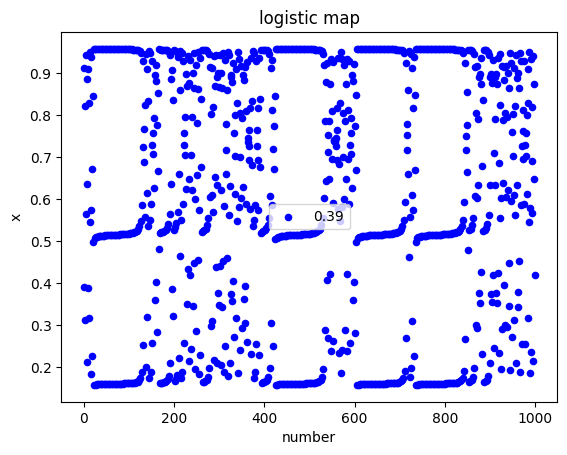

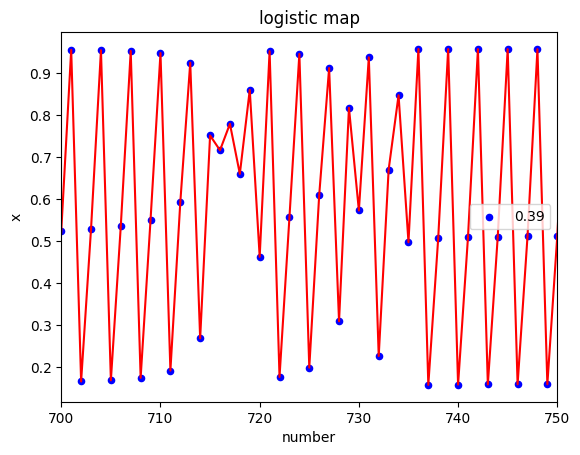

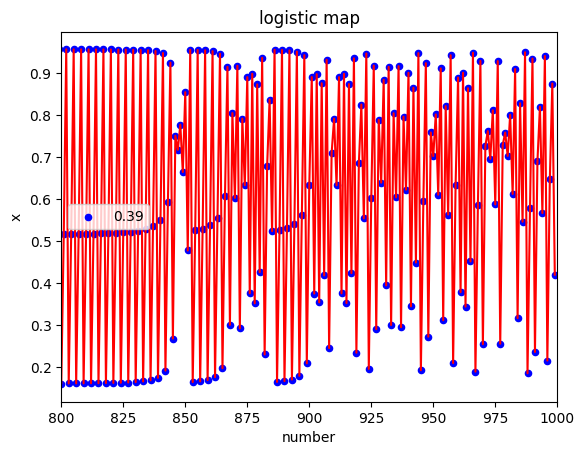

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x_data = []
y_data = [] #ここにデータを入れていく
x_init = 0.39  #xの初期値
x_data.append(x_init)
a = 1+np.sqrt(8)-0.00001    #aの値を設定
n = 6000        #n個データを作る
def function(x):    #ロジスティック写像
    y = a*x*(1-x)
    return y
for i in range(n):
    y = function(x_data[-1])
    y_data.append(y)
    if i == n-1:
        break
    x_data.append(y_data[-1])

# DataFrameの作成
df = pd.DataFrame(x_data)

# CSVファイルとして保存
df.to_csv('data.csv', index=False)



# グラフ作成用インデックス
data = np.arange(0, n)
df_number = pd.DataFrame(data)


#データをPandasで読み込み
df = pd.read_csv("data.csv")


plt.scatter(df_number,df,color='blue',s=20, label="{}".format(x_init))
plt.xlabel("number")
plt.ylabel("x")
plt.title("logistic map")
plt.legend()
plt.show()
plt.close()

plt.scatter(df_number,df,color='blue',s=20, label="{}".format(x_init))
plt.plot(df_number,df,color='red')
plt.xlabel("number")
plt.ylabel("x")
plt.title("logistic map")
plt.legend()
plt.xlim(700, 750)
plt.show()
plt.close()

plt.scatter(df_number,df,color='blue',s=20, label="{}".format(x_init))
plt.plot(df_number,df,color='red')
plt.xlabel("number")
plt.ylabel("x")
plt.title("logistic map")
plt.legend()
plt.xlim(800, 1000)
plt.show()
plt.close()




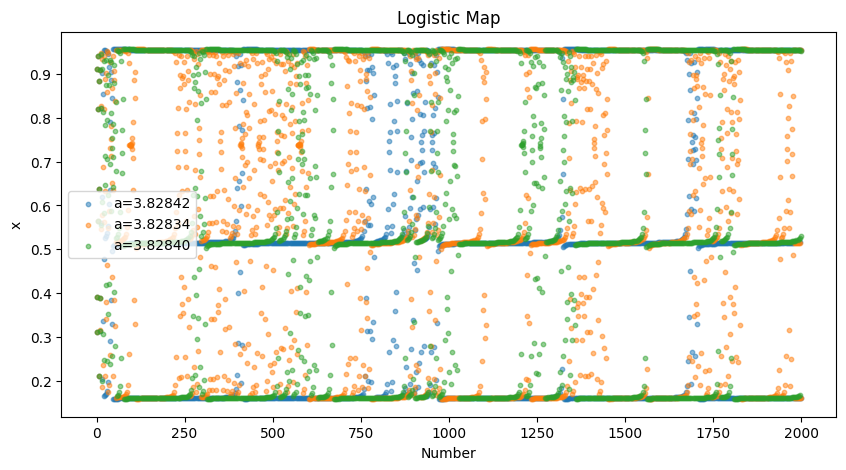

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# aの値のリスト
a_values = [1 + np.sqrt(8) - 0.00001, 1 + np.sqrt(8) - 0.00009, 1 + np.sqrt(8) - 0.00003]

# xの初期値
x_init = 0.39

# n個データを作る
n = 2000

def logistic_map(x, a):
    return a * x * (1 - x)

# データを生成し、散布図にプロット
plt.figure(figsize=(10, 5))
for a in a_values:
    x_data = [x_init]
    for i in range(n):
        x_next = logistic_map(x_data[-1], a)
        x_data.append(x_next)

    # グラフ作成用インデックス
    data_index = np.arange(0, n+1)
    plt.scatter(data_index, x_data, label=f"a={a:.5f}", alpha=0.5, s=10)

plt.xlabel("Number")
plt.ylabel("x")
plt.title("Logistic Map")
plt.legend()
plt.show()
